<html>
    <h1 align='center'>Peramalan Jumlah Kasus Demam Berdarah di
        Kabupaten Malang Menggunakan Metode Fuzzy
        Inference System</h1>
</html>

<html>
    <div align='full'>Berikut merupakan percobaan implementasi paper metode "<i>Fuzzy Logic</i>" menggunakan bahasa Python dengan modul scikit-fuzzy.</div>
</html>

### Import Modul
<html>
    <div><br>Implementasi fuzzy dengan python menggunakan modul:
    <ul>
        <li><b>Sci-Kit Fuzzy</b>, untuk operasi logika fuzzy</li>
        <img src="https://pythonhosted.org/scikit-fuzzy/_static/img/logo.png" alt="Logo SKFuzzy" width=200><img>
        <li><b>Matplotlib</b>, untuk visualisasi</li>
        <img src="https://matplotlib.org/_static/logo2.png" alt="Logo Matplotlib " width=200><img>
        <li><b>Numpy</b>, untuk pengoperasian matematika</li>
        <img src="https://static.javatpoint.com/tutorial/numpy/images/numpy-tutorial.png" alt="Logo Numpy"><img>
        </ul>
    </div>
</html>

In [1]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

<html>
    <div><br>Dalam Sistem Fuzzy, diperlukan nilai input, output dan model fuzzy. Disini dideklarasikan sebuah deret bilangan <i>"dbd"</i> dan <i>"rakyat"</i> yang akan digunakan sebagai lintasan pada fungsi keanggotaan fuzzy.</div>
</html>

In [2]:
dbd=np.arange(0,251,1)
rakyat=np.arange(240,291,1)

<html>
    <div>
        Di dalam modul SKFuzzy, terdapat modul bernama control yang berfungsi untuk mengendalikan sistem fuzzy. Terdapat fungsi Antecedent yang mendeklarasikan input, lalu Consequent yang mendeklarasikan output. 
    </div>
</html>

In [3]:
lvl=ctrl.Antecedent(dbd,'lvl')
grow=ctrl.Antecedent(rakyat,'grow')
output=ctrl.Consequent(dbd,'output')

<html>
    <div>
        Di bawah terdapat fungsi keanggotaan menggunakan <i>SKFuzzy Membership Function</i> dengan bermacam bentuk yaitu segitiga(trimf), trapezoid(trapmf), dan sigmoid(sigmf).
    </div>
</html>

In [14]:
VVL=fuzz.trapmf(dbd,[1,1,5,10])
VL=fuzz.trimf(dbd,[7.5,13.75,20])
L=fuzz.trimf(dbd,[17.5,23.75,30])
N=fuzz.trimf(dbd,[25,37.5,50])
H=fuzz.trimf(dbd,[40,65,90])
VH=fuzz.trimf(dbd,[80,120,160])
VVH=fuzz.trapmf(dbd,[150,200,249,249])
grw=fuzz.sigmf(rakyat,266.3042,0.4)

Alasan digunakannya trapezoid untuk "Very Very Low" dan "Very Very High" adalah dikarenakan kedua fungsi yang ekstrim sehingga perbedaan nilai tidak berpengaruh besar. Digunakan sigmoid untuk pertumbuhan masyarakat dikarenakan pertumbuhan masyarakat termasuk ke fungsi kompleks-natural

<html>
    <h3>Visualisasi dari pada fungsi keanggotaan:</h3>
</html>

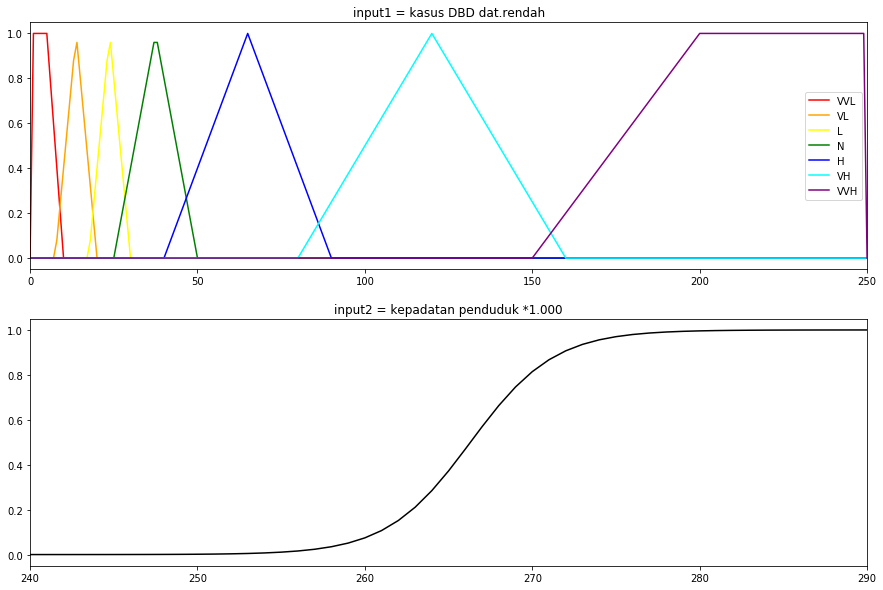

In [15]:
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(15,10))
ax1.plot(dbd,VVL,'red',linewidth=1.5,label='VVL')
ax1.plot(dbd,VL,'orange',linewidth=1.5,label='VL')
ax1.plot(dbd,L,'yellow',linewidth=1.5,label='L')
ax1.plot(dbd,N,'green',linewidth=1.5,label='N')
ax1.plot(dbd,H,'blue',linewidth=1.5,label='H')
ax1.plot(dbd,VH,'cyan',linewidth=1.5,label='VH')
ax1.plot(dbd,VVH,'purple',linewidth=1.5,label='VVH')
ax2.plot(rakyat,grw,'black',linewidth=1.5,label='grow')
ax1.set_ybound(-0.05,1.05)
ax1.set_xbound(0,250)
ax2.set_ybound(-0.05,1.05)
ax2.set_xbound(240,290)
ax1.set_title('input1 = kasus DBD dat.rendah')
ax2.set_title('input2 = kepadatan penduduk *1.000')
ax1.legend()
plt.show()

<html>
    <div>Selanjutnya memasukkan fungsi keanggotaan kedalam input fuzzy</div>
</html>

In [6]:
lvl['VVL']=VVL
lvl['VL']=VL
lvl['L']=L
lvl['N']=N
lvl['H']=H
lvl['VH']=VH
lvl['VVH']=VVH
grow['pertumbuhan']=grw

Membuat fungsi keluaran dari sistem fuzzy

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


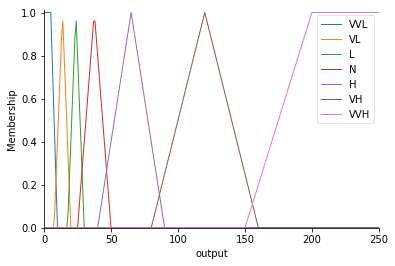

In [7]:
output['VVL']=fuzz.trapmf(dbd,[0,0,5,10])
output['VL']=fuzz.trimf(dbd,[7.5,13.75,20])
output['L']=fuzz.trimf(dbd,[17.5,23.75,30])
output['N']=fuzz.trimf(dbd,[25,37.5,50])
output['H']=fuzz.trimf(dbd,[40,65,90])
output['VH']=fuzz.trimf(dbd,[80,120,160])
output['VVH']=fuzz.trapmf(dbd,[150,200,250,250])
output.view()

<div>membuat rule/aturan yang digunakan sistem fuzzy untuk komputasi keluaran berdasarkan input yang diberikan</div>
<table style="border: 1px solid black">
  <tr>
    <th>No.</th>
    <th>input1</th>
    <th>input2</th>
    <th>output</th>
  </tr>
  <tr>
    <td>1</td>
    <td>VVL</td>
    <td>grow</td>
    <td>VVL</td>
  </tr>
  <tr>
    <td>2</td>
    <td>VL</td>
    <td>grow</td>
    <td>VL</td>
  </tr>
  <tr>
    <td>3</td>
    <td>L</td>
    <td>grow</td>
    <td>L</td>
  </tr>
  <tr>
    <td>4</td>
    <td>N</td>
    <td>grow</td>
    <td>N</td>
  </tr>
  <tr>
    <td>5</td>
    <td>H</td>
    <td>grow</td>
    <td>H</td>
  </tr>
  <tr>
    <td>6</td>
    <td>VH</td>
    <td>grow</td>
    <td>VH</td>
  </tr>
  <tr>
    <td>7</td>
    <td>VVH</td>
    <td>grow</td>
    <td>VVH</td>
  </tr>
</table>

In [8]:
r1=ctrl.Rule(lvl['VVL'] & grow['pertumbuhan'], output['VVL'])
r2=ctrl.Rule(lvl['VL'] & grow['pertumbuhan'], output['VL'])
r3=ctrl.Rule(lvl['L'] & grow['pertumbuhan'], output['L'])
r4=ctrl.Rule(lvl['N'] & grow['pertumbuhan'], output['N'])
r5=ctrl.Rule(lvl['H'] & grow['pertumbuhan'], output['H'])
r6=ctrl.Rule(lvl['VH'] & grow['pertumbuhan'], output['VH'])
r7=ctrl.Rule(lvl['VVH'] & grow['pertumbuhan'], output['VVH'])

Semua rule kemudian dikumpulkan kedalam satu kontrol sistem untuk mendapatkan hasil

In [ ]:
hasil=ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7])

Sistem sekarang bisa dicoba menggunakan data input atau testcase

In [ ]:
coba=ctrl.ControlSystemSimulation(hasil)

In [ ]:
coba.input['lvl']=85
coba.input['grow']=270

Dicoba menggunakan jumlah kasus berdarah sebanyak 85 kasus dan jumlah penduduk 2,7 juta orang

In [ ]:
coba.compute()

In [ ]:
print(coba.output['output'])
output.view(sim=coba)

Didapatkanlah keluaran dalam bentuk fuzzy mamdani dengan nilai 93.384

<html>
    <p><cite>Sumber:<a href="http://www.ejurnal.its.ac.id/index.php/teknik/article/viewFile/14114/2543">Peramalan Jumlah Kasus Demam Berdarah di Kabupaten Malang Menggunakan Metode Fuzzy Inference System</a></cite> </p>
</html>

<html>
    <a href="http://www.unsri.ac.id/?act=detil_mahasiswa&mhs=09011281722064-9-10003&akt=2017" target="_blank">Mohammad El Qiliqsandy<br>09011281722064<br><img src="https://akademik.unsri.ac.id/images/foto_mhs/2017/09011281722064.jpg" width=100 align="left"><img></a>
    <a href="http://www.unsri.ac.id"><img src="http://www.unsri.ac.id/upload/images/logounsri14092008_3793.jpg" align="right" width=140></img></a>
</html>